# **APLICACIÓN ESTADÍSTICA AL ANÁLISIS DE DATOS**

## CLASE 13

## Prof. Esteban Arroyo

## **MODELOS DE CLUSTERING**

El **clustering** es una técnica de **Aprendizaje No-Supervizado**, que busca identificar de manera automática diferentes agrupaciones (clústeres) de elementos dependiendo de la similitud que exista entre ellos.

El objetivo fundamental de las técnicas de clustering es la de identificar diversos grupos donde la similitud entre los miembros del mismo grupo sea alta y la similitud con los miembros de otros grupos sea baja.

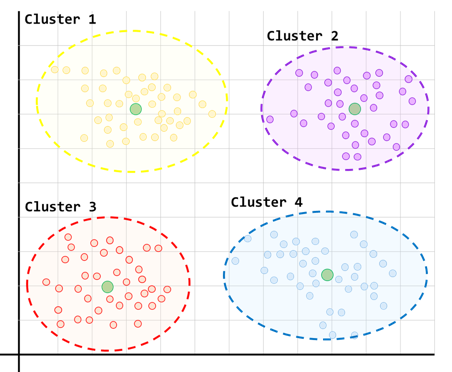

Existen múltiples algoritmos de clustering, pero a continuación se presenta un esquema donde se observan cuatro tipos
de algoritmos de clustering diferentes.

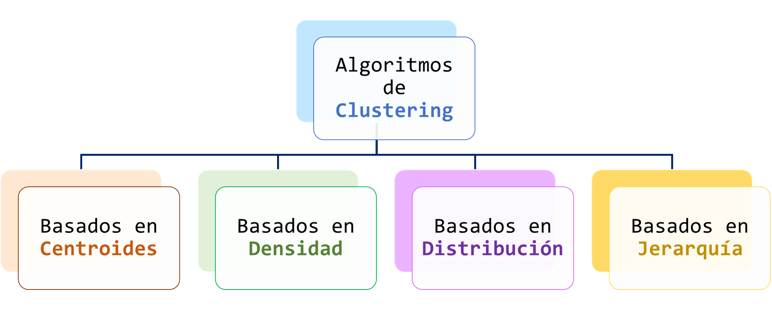

### **Agrupamiento en clústeres basado en la densidad**

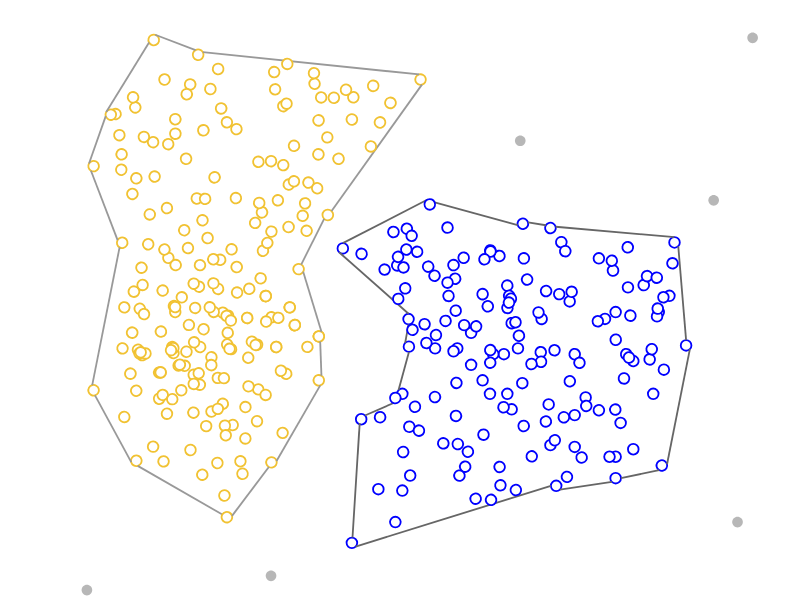

El agrupamiento en clústeres basado en la densidad, se basa en la detección de áreas que poseen mayores concentraciones de puntos y aquellas áreas vacías o con escasos puntos.

### **Agrupamiento en clústeres basado en la distribución**

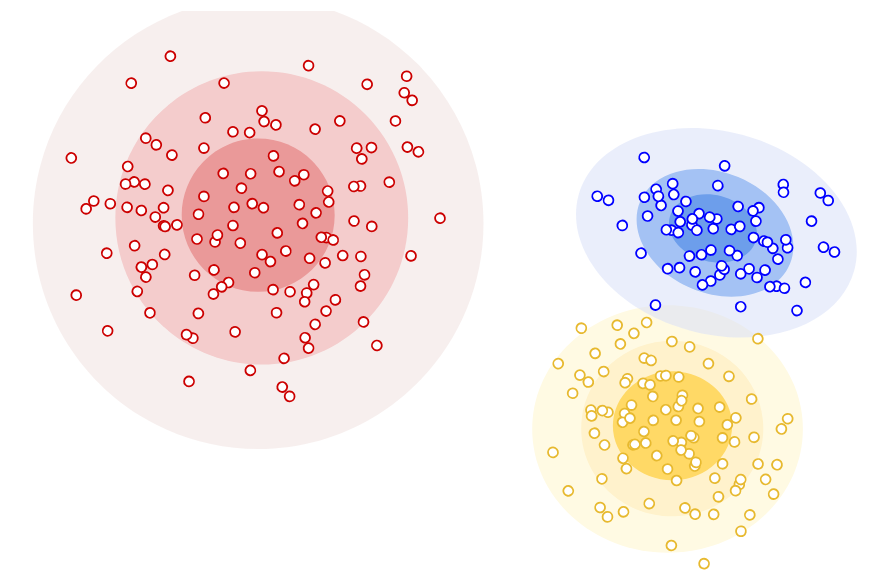


En este enfoque de agrupamiento en clústeres, se considera que todos los puntos de datos forman parte de un grupo según la probabilidad de que un punto pertenezca a un grupo determinado, basado en alguna distribución probabilistica conocida, como la distribución gaussiana.

### **Agrupamiento en clústeres jerárquico**
El agrupamiento en clústeres jerárquico crea uns estructura en forma de árbol. Un caso típico son datos organizados en taxonomías.

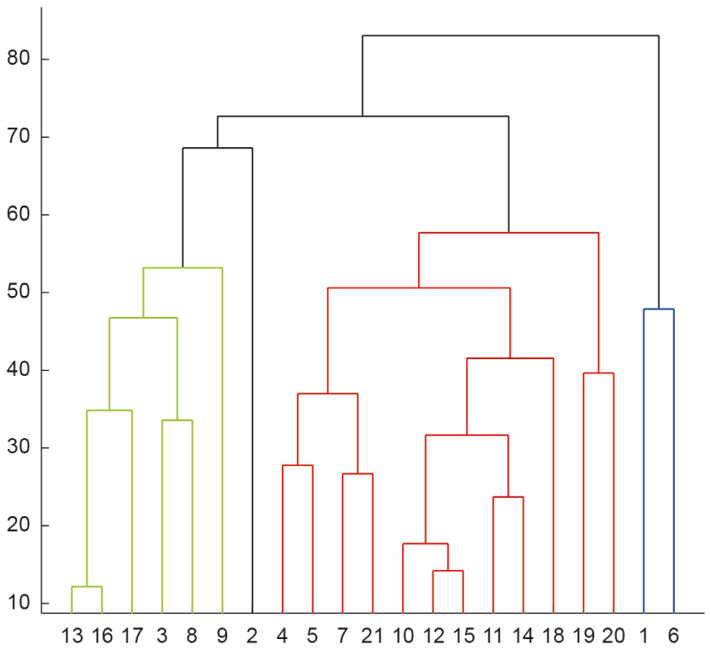

### **Agrupamiento en clústeres basado en centroides**

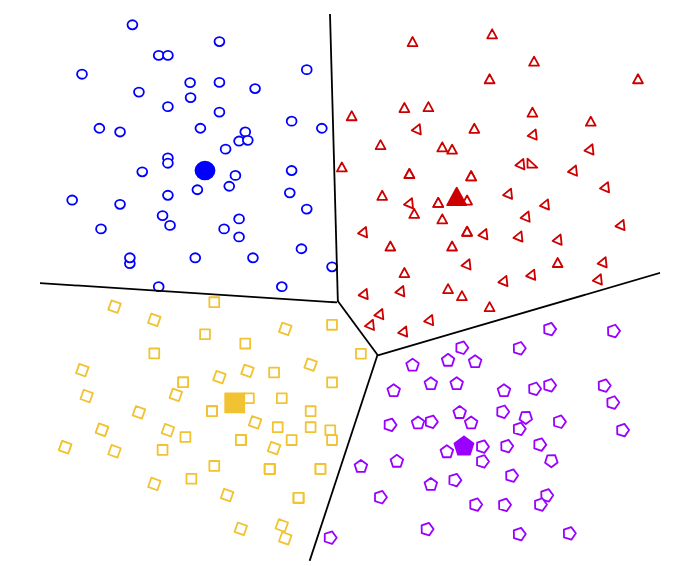

El agrupamiento en clústeres basado en centroides organiza los datos en clústeres no jerárquicos. k-means es el algoritmo de agrupamiento en clústeres basado en centroides más usado. Los algoritmos basados en centroides son eficientes, pero sensibles a las condiciones y valores atípicos iniciales

## **K-MEANS**

El algoritmo de K-Means es un algoritmo de Clustering basado en Centroides que agrupa diversos elementos en k grupos basándose en la similitud de las características de los elementos.

El agrupamiento se realiza a través de un proceso iterativo donde en cada una de sus repeticiones se pretende minimizar la suma del cuadrado de las distancias entre cada uno de los objetos y el centroide de su grupo o clúster. El algoritmo consta de tres pasos:

1. Asignación inicial de los centroides.
2. Creación de los conjuntos tomando en cuenta que elementos están más cerca a cada centroide.
3. Actualización de los centroides.

Los pasos 2 y 3 se repetirán hasta que los centroides no se muevan o que se muevan debajo de un umbral definido por el investigador. Incluso es posible parar el procedimiento definiendo desde el principio un número máximo de
repeticiones.

En el siguiente ejemplo se observa un conjunto de puntos distribuidos, el algoritmo de K-Means buscará generar diferentes conjuntos de puntos, basándose en el posicionamiento de centroides.

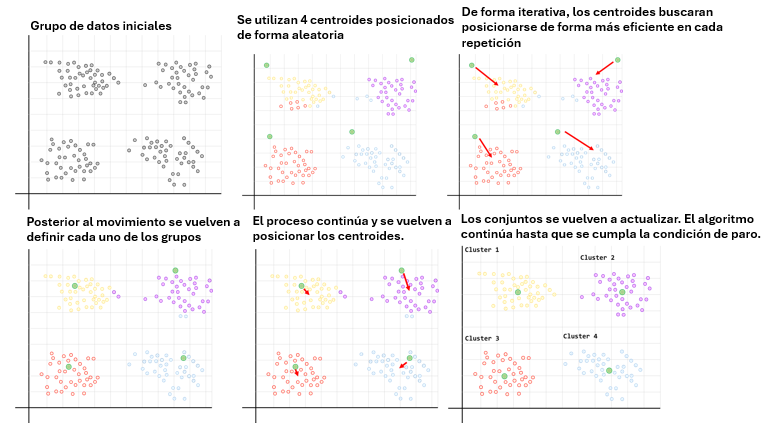

## **Usando K-Means con Python**

Usaremos la funcionalidad de KMeans del módulo "cluster" de Sklearn.

Es importante destacar que los datos de entrada o datos a utilizar por el algoritmo k-means deberán ser de valores numéricos-contínuos.

Además es recomendable que los valores utilizados estén normalizados, manteniendo una misma escala.

Igualmente, no conviene utilizar variables que estén muy correlacionadas entre ellas o que sean escalares de otros.

Uno de los parámetros que es muy importante definir, es el valor K, que se traduce como el número de clusters o centroides con los que va a trabajar el algoritmo.

### ¿cuál es el valor k óptimo?

En general no hay un modo exacto de determinar el valor K, sin embargo, se puede estimar con aceptable precisión siguiendo la siguiente técnica:

#### La regla del codo

Una de las métricas usada para comparar resultados es la distancia media entre los puntos de datos y su centroide. Como el valor de la media diminuirá a medida de aumentemos el valor de K, deberemos utilizar la distancia media al centroide en función de K y entontrar el “punto codo”, donde la tasa de descenso se “afila”.

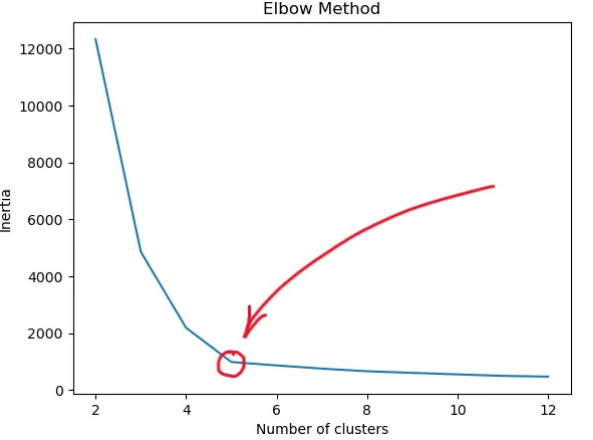

#### Método de Silhouette

Es otra métrica para evaluar el número de conglomerados. Es un indicador plantea que cuanto mayor sea la puntuación, es mejor. Por tanto, se debe seleccionar aquel que tenga el mayor valor.

El valor de la puntuación de Silhouette varía de -1 a 1. Si la puntuación es 1, el grupo es denso y está bien separado que otros grupos. Un valor cercano a 0 representa conglomerados superpuestos con muestras muy cercanas al límite de decisión de los conglomerados vecinos.


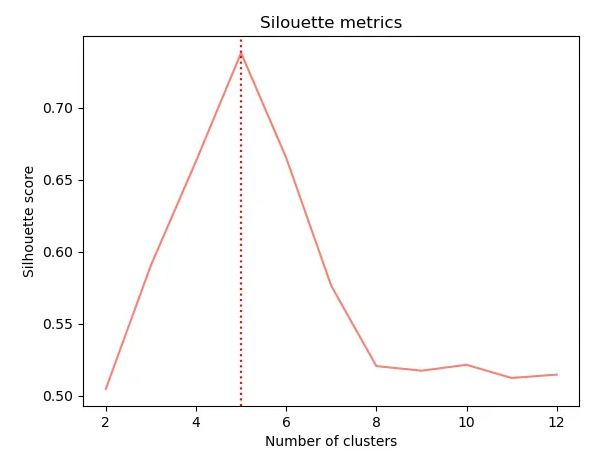


Para más detalles sobre los argumentos, revisar la documentación oficial: https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans

In [ ]:
#Cargamos las librerias que vamos a usar
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn import preprocessing
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.model_selection import train_test_split

In [ ]:
# Cargamos los datos
df = pd.read_csv('https://raw.githubusercontent.com/estebanlab2021/python_analysis/master/datos/ejemplo_python.csv', sep=";")
df.head()

,Age,Employ,Income,Debtinc,Creddebt,OthDebt,Education
0,28,7,44,17.7,2.99,4.80,Med
1,64,34,116,14.7,5.05,12.00,Posg
2,40,20,61,4.8,1.04,1.89,Bas
3,30,11,27,34.5,1.75,7.56,Bas
4,25,2,30,22.4,0.76,5.96,Bas


In [ ]:
#Realizamos una "limpieza de los datos"
df.loc[df['Income'] < 15, ['Income']] = np.nan
df.loc[df['Income'] > 100, ['Income']] = np.nan
df.loc[df['Age'] > 70, ['Age']] = np.nan
df.loc[df['Employ'] > 40, ['Employ']] = np.nan
df.loc[df['Debtinc'] < 1, ['Debtinc']] = np.nan
df.loc[df['Debtinc'] > 28, ['Debtinc']] = np.nan
df.loc[df['Creddebt'] > 7, ['Creddebt']] = np.nan
df.loc[df['OthDebt'] > 30, ['OthDebt']] = np.nan

df = df.dropna(axis=0, how='any')  #eliminamos todos los "nan"

print(df.shape)   #volvemos a verificar la forma de la base

(973, 7)


In [ ]:
#Aplicamos el logaritmo para transformar las variables independientes y tratar de corregir la asimetría
df['Income'] = np.log(df['Income']+1)
df['Creddebt'] = np.log(df['Creddebt']+1)
df['OthDebt'] = np.log(df['OthDebt']+1)
df['Debtinc'] = np.log(df['Debtinc']+1)

In [ ]:
#Eliminamos la variable Education
del df["Education"]
df.head()

,Age,Employ,Income,Debtinc,Creddebt,OthDebt
0,28.0,7.0,3.806662,2.928524,1.383791,1.757858
2,40.0,20.0,4.127134,1.757858,0.712950,1.061257
4,25.0,2.0,3.433987,3.152736,0.565314,1.940179
5,26.0,2.0,3.663562,2.557227,0.667829,1.519513
6,25.0,4.0,3.433987,2.734368,0.717840,1.451614


In [ ]:
#Realizamos la Normalización
scaler_data = preprocessing.MinMaxScaler().fit_transform(df)
df_scaled = pd.DataFrame(scaler_data, index=df.index, columns=df.columns)
df_scaled.head()

,Age,Employ,Income,Debtinc,Creddebt,OthDebt
0,0.192308,0.175,0.561224,0.839184,0.666316,0.606728
2,0.423077,0.500,0.735155,0.399704,0.338606,0.353900
4,0.134615,0.050,0.358962,0.923356,0.266485,0.672901
5,0.153846,0.050,0.483559,0.699795,0.316565,0.520222
6,0.134615,0.100,0.358962,0.766296,0.340995,0.495578


### Regla del codo

Hacemos un ciclo for para encontrar el numero de clusters optimo para nuestra base de datos, para esto se analizan las distancias a los centroides de los clusters. Utilizamos la tecnica de segmentación de k medias que se basa en las distancias euclidianas.

In [ ]:
Sum_of_squared_distances = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', n_init='auto', random_state=3)
    kmeans.fit(df_scaled)
    Sum_of_squared_distances.append(kmeans.inertia_)

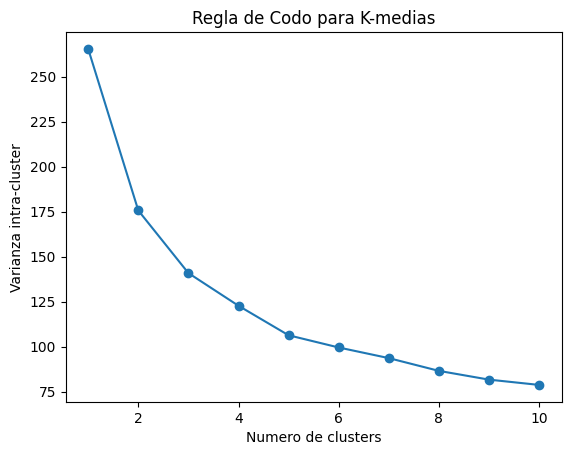

In [ ]:
#Graficamos
plt.plot(range(1, 11), Sum_of_squared_distances, 'o-')
plt.title('Regla de Codo para K-medias')
plt.xlabel('Numero de clusters')
plt.ylabel('Varianza intra-cluster')
plt.show()

Podemos ver que de 1 a 4 clusters disminuyen harto las distancias, pero luego de eso se mantiene mas contantes.

### Método de Silhouette

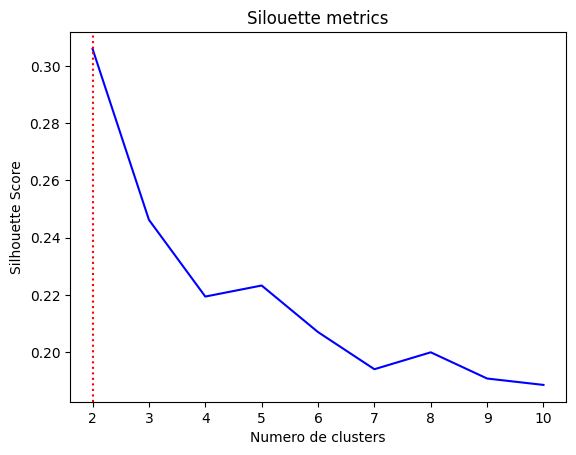

In [ ]:
from sklearn.metrics import silhouette_score

sil_scores = []
for i in range(2, 11):
  kmeans = KMeans(n_clusters = i, init='k-means++', n_init='auto', random_state = 3)
  kmeans.fit(df_scaled)
  sil_scores.append(silhouette_score(df_scaled, kmeans.labels_, metric='euclidean'))


# Graficamos para visualizar
k = range(2,11)
plt.plot(k, sil_scores, color = 'blue')
plt.axvline(x = sil_scores.index(max(sil_scores))+2, linestyle = 'dotted', color = 'red')
plt.xlabel('Numero de clusters')
plt.ylabel('Silhouette Score')
plt.title('Silouette metrics')
plt.show()

In [ ]:
km = KMeans(n_clusters=2, max_iter=100,  n_init='auto', random_state=3)
km.fit(df_scaled)
score = silhouette_score(df_scaled, km.labels_, metric='euclidean')
print('Silhouetter Score para 2 clusters: %.3f'% score)

Silhouetter Score para 2 clusters: 0.306


## Solución con 2 clusters

Creamos los clusters con K medias definiendo el numero de clusters a utilizar que en este caso sera 2 y luego ajustamos los datos a este modelo.

In [ ]:
kmeans = KMeans(n_clusters=2, max_iter=100,  n_init='auto', random_state=3)
kmeans.fit(df_scaled)

KMeans(max_iter=100, n_clusters=2, n_init='auto', random_state=3)

Vemos el tamaño de cada cluster. Para esto obtenemos a que cluster pertenece cada dato (labels) y luego contamos cuantos datos hay en cada cluster (label).

In [ ]:
#Guardamos las labels
labels = kmeans.labels_
print(labels)
counts = np.bincount(labels[labels>=0])
#Tamaño de los clusters
size_clusters = pd.DataFrame(counts, columns=['size'])
print(size_clusters)

[1 1 1 0 0 0 1 1 0 1 0 1 0 0 0 1 1 1 1 1 0 0 0 0 1 0 0 1 1 0 0 0 1 1 0 0 0
 0 1 1 1 1 0 0 1 0 0 1 1 0 0 0 0 0 1 0 1 0 0 1 1 0 1 1 0 0 1 0 0 1 0 0 0 0
 0 1 0 1 1 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 1 1 1 0 0
 0 0 1 1 0 1 0 0 0 1 0 1 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 1 1 0 1 0 0 1 0
 1 1 0 0 0 0 0 0 0 1 1 1 1 1 1 0 0 1 0 0 1 0 0 0 0 0 1 0 1 0 1 0 0 1 1 0 1
 0 0 1 1 0 0 1 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 1 1 0 1 0 0 1 0 0 1 0 1 0 1 0
 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 1 0 0 1 0 0 0 1 0 1 1 0 0 0 1 1
 1 0 0 0 1 1 0 1 0 1 0 0 0 1 1 1 0 1 1 0 0 1 0 1 1 0 0 0 0 1 0 1 0 1 1 1 0
 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 1 0 0 0 1 1 1 1 1 1 0 0 1 0 1 1 0 1 1 1 0
 0 0 1 1 0 0 0 0 1 0 1 0 0 0 0 1 1 0 0 1 1 0 0 0 1 0 0 0 1 0 1 1 1 1 0 0 1
 0 0 0 0 0 0 1 1 0 0 0 0 0 1 1 0 0 1 0 1 1 0 0 1 0 0 1 0 1 1 1 0 1 0 0 0 1
 0 0 1 0 0 0 1 1 0 1 1 0 0 0 0 1 1 1 0 1 1 1 0 0 0 1 0 0 0 0 1 0 1 0 0 1 0
 0 1 1 0 1 1 0 1 1 0 0 0 0 1 1 1 0 1 0 0 1 1 1 0 0 1 1 0 1 1 0 0 1 0 0 1 0
 1 0 0 1 0 0 1 0 0 0 1 0 

Asignamos a cada fila el cluster correspondiente, lo agregamos en la data_set sin normalizar para guardar los datos en la escala correcta.

In [ ]:
df["cluster"] = labels
print(df)

       Age  Employ    Income   Debtinc  Creddebt   OthDebt  cluster
0     28.0     7.0  3.806662  2.928524  1.383791  1.757858        1
2     40.0    20.0  4.127134  1.757858  0.712950  1.061257        1
4     25.0     2.0  3.433987  3.152736  0.565314  1.940179        1
5     26.0     2.0  3.663562  2.557227  0.667829  1.519513        0
6     25.0     4.0  3.433987  2.734368  0.717840  1.451614        0
...    ...     ...       ...       ...       ...       ...      ...
1185  20.0     0.0  3.091042  2.778819  0.815365  1.068153        0
1186  22.0     0.0  3.951244  2.272126  0.727549  1.474763        1
1188  24.0     1.0  3.610918  2.639057  0.693147  1.543298        0
1190  51.0     9.0  4.418841  2.747271  0.916291  2.440606        1
1192  33.0     3.0  3.295837  2.624669  0.652325  1.226712        0

[973 rows x 7 columns]


In [ ]:
#Con los clusters definidos, podemos sacar las estadisticas para cada variables y así obtener una caracterización
df_custer1 = df.loc[df.loc[:, 'cluster'] == 0]
print("--------------------------Cluster 1-------------------------")
print(df_custer1.iloc[:, 0:6].describe())
print("--------------------------Cluster 2-------------------------")
df_custer2 = df.loc[df.loc[:, 'cluster'] == 1]
print(df_custer2.iloc[:, 0:6].describe())


--------------------------Cluster 1-------------------------
              Age      Employ      Income     Debtinc    Creddebt     OthDebt
count  565.000000  565.000000  565.000000  565.000000  565.000000  565.000000
mean    26.780531    2.410619    3.387978    2.006654    0.459093    0.834686
std      8.422865    3.431895    0.327841    0.578511    0.281747    0.379469
min     18.000000    0.000000    2.772589    0.693147    0.019803    0.086178
25%     20.000000    0.000000    3.135494    1.589235    0.239017    0.524729
50%     25.000000    1.000000    3.367296    2.028148    0.425268    0.824175
75%     30.000000    4.000000    3.610918    2.433613    0.636577    1.081805
max     65.000000   23.000000    4.605170    3.328627    1.512927    2.048982
--------------------------Cluster 2-------------------------
              Age      Employ      Income     Debtinc    Creddebt     OthDebt
count  408.000000  408.000000  408.000000  408.000000  408.000000  408.000000
mean    38.656863   

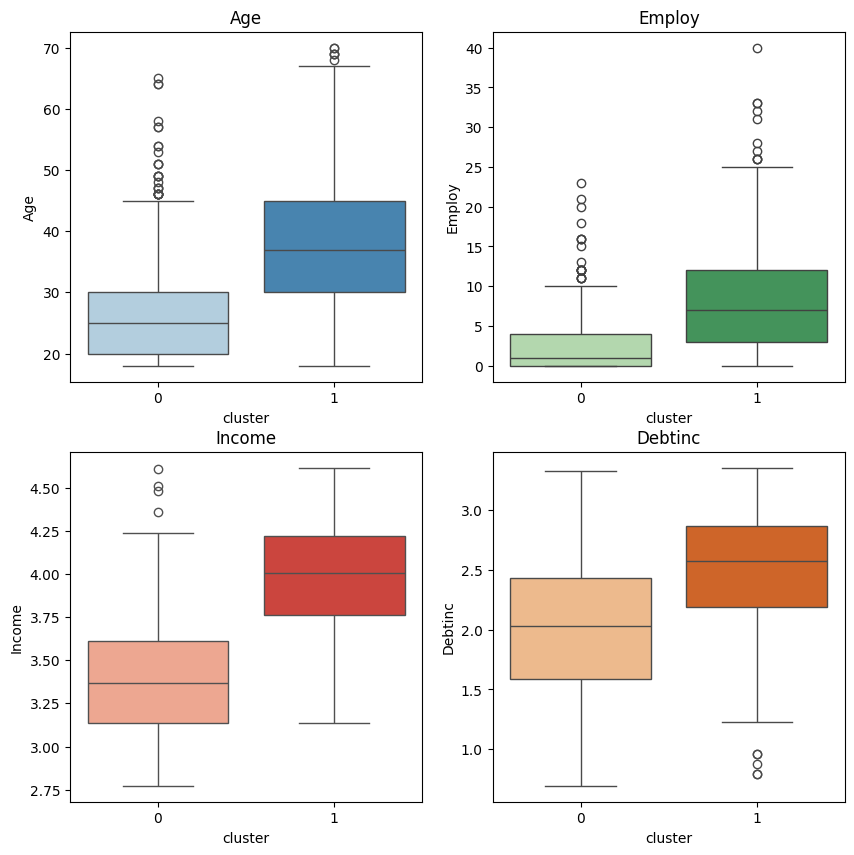

In [ ]:
#Asi como realizar graficos
import seaborn as sns
#import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 2, figsize=(10, 10))

sns.boxplot(x='cluster', y='Age', hue="cluster", data=df, width=0.8, ax=axes[0, 0], palette="Blues", legend=False)
axes[0,0].set_title("Age")
sns.boxplot(x='cluster', y='Employ', hue="cluster", data=df, width=0.8, ax=axes[0, 1], palette="Greens", legend=False)
axes[0,1].set_title("Employ")
sns.boxplot(x='cluster', y='Income', hue="cluster", data=df, width=0.8, ax=axes[1, 0], palette="Reds", legend=False)
axes[1,0].set_title("Income")
sns.boxplot(x='cluster', y='Debtinc', hue="cluster", data=df, width=0.8, ax=axes[1, 1], palette="Oranges", legend=False)
axes[1,1].set_title("Debtinc")

plt.show()

### Calcular el índice de Davies-Bouldin para evaluar la calidad de los clusters

Permite evaluar la calidad de la agrupación comparando la similitud promedio entre los grupos más similares por pares.

En este contexto, la similitud se define como la relación entre las distancias entre grupos e intragrupos. Como tal, este índice clasifica a los conglomerados bien separados y con menos dispersión como los que tienen una mejor puntuación.

Los valores más altos del índice corresponden a soluciones de agrupación más deficientes. Esto se debe a que un valor de DBI más alto indica que los grupos no están bien separados y/o que los grupos no son compactos.

Sin embargo, es deseable un valor de índice más bajo. Indica que los grupos están bien separados y son compactos, lo que suele ser un buen indicador de una solución de agrupación exitosa.

In [ ]:
from sklearn.metrics import davies_bouldin_score
db_index = davies_bouldin_score(df_scaled, labels)
print(f"Davies-Bouldin Index: {db_index}")

Davies-Bouldin Index: 1.3108575195392587


In [ ]:
# Solución con 3 clusters
kmeans3 = KMeans(n_clusters=3, max_iter=100,  n_init='auto', random_state=3)
kmeans3.fit(df_scaled)
labels3 = kmeans3.labels_
db_index3 = davies_bouldin_score(df_scaled, labels3)
print(f"Davies-Bouldin Index: {db_index3}")

Davies-Bouldin Index: 1.2847366917459846


In [ ]:
db_scores = []
for i in range(2, 11):
  km = KMeans(n_clusters = i, init='k-means++', n_init='auto', random_state = 3)
  km.fit(df_scaled)
  lab = km.labels_
  db_scores.append(davies_bouldin_score(df_scaled, lab))

In [ ]:
db_scores_df = pd.DataFrame({"cluster":range(2, 11), "db_scores":db_scores})
print(db_scores_df)

   cluster  db_scores
0        2   1.310858
1        3   1.284737
2        4   1.416816
3        5   1.310628
4        6   1.411513
5        7   1.448245
6        8   1.391635
7        9   1.370583
8       10   1.429233


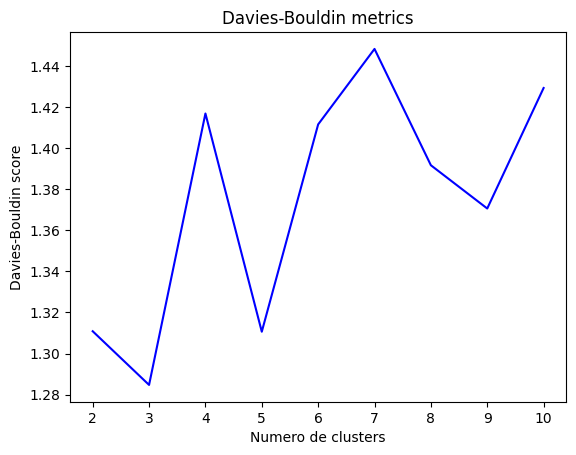

In [ ]:
# Graficamos para visualizar
plt.plot(db_scores_df['cluster'], db_scores_df['db_scores'], color = 'blue')
plt.xlabel('Numero de clusters')
plt.ylabel('Davies-Bouldin score')
plt.title('Davies-Bouldin metrics')
plt.show()

Se puede apreciar en este caso, que se puede usar un k=3. Pero finalmente, la decisión última sobre cuantos clusters de deben usar, estará condicionada a la experiencia y conocimiento del investigador sobre el tipo de datos que se esten trabajando y por otro lado, la estructura interna de los datos